# Chinese Word Analysis

## Introduction

Learning a language is a laborious task as there are too many words to learn. However, a (frequent) set of words cover a high percentage of the text used.
In this document, we want to analyze how much this percentage increase as we add words to our knowledge.
For this analysis, the Chinese language has been selected. It is a particularly interesting language for this study because it gives us the possibility to analyze the language not only using the words but also using Chinese characters. Words are formed by one or more characters, and each character can belong to one or more words.

## The data

The data has been obtained from https://invokeit.wordpress.com/frequency-word-lists/. It contains a list of words and the number of occurrences. The words are ordered from the most frequents to the least.
Executing the following script we download the data and clean it (remove non-Chinese words). The last command process the data to obtain a list of occurrences of characters (not words). For doing that, every word is split and the number of occurrences is recalculated.

In [1]:
options(repr.plot.width=15, repr.plot.height=10)
#unzip data
system('sh get_preprocess_data.sh')

We have now two data sets:

 * zh_cn_clean.txt: Frequency list of chinese words, in descending order.
 * zh_cn_characters.txt: Frequency list of chinese characters, in descending order.

We are loading these datasets in order to perform our analysis.

In [2]:
#load data
data.words<-read.table('data/zh_cn_clean.txt')
data.chars<-read.table('data/zh_cn_characters.txt',quote="")

## Analysis

In this document, we are going to analyse the number of words needed to cover the Chinese language.

First, we calculate the probability (in percentage) of each word/character appearing in the Chinese text. Then we perform a cumulative summation and plot it. 

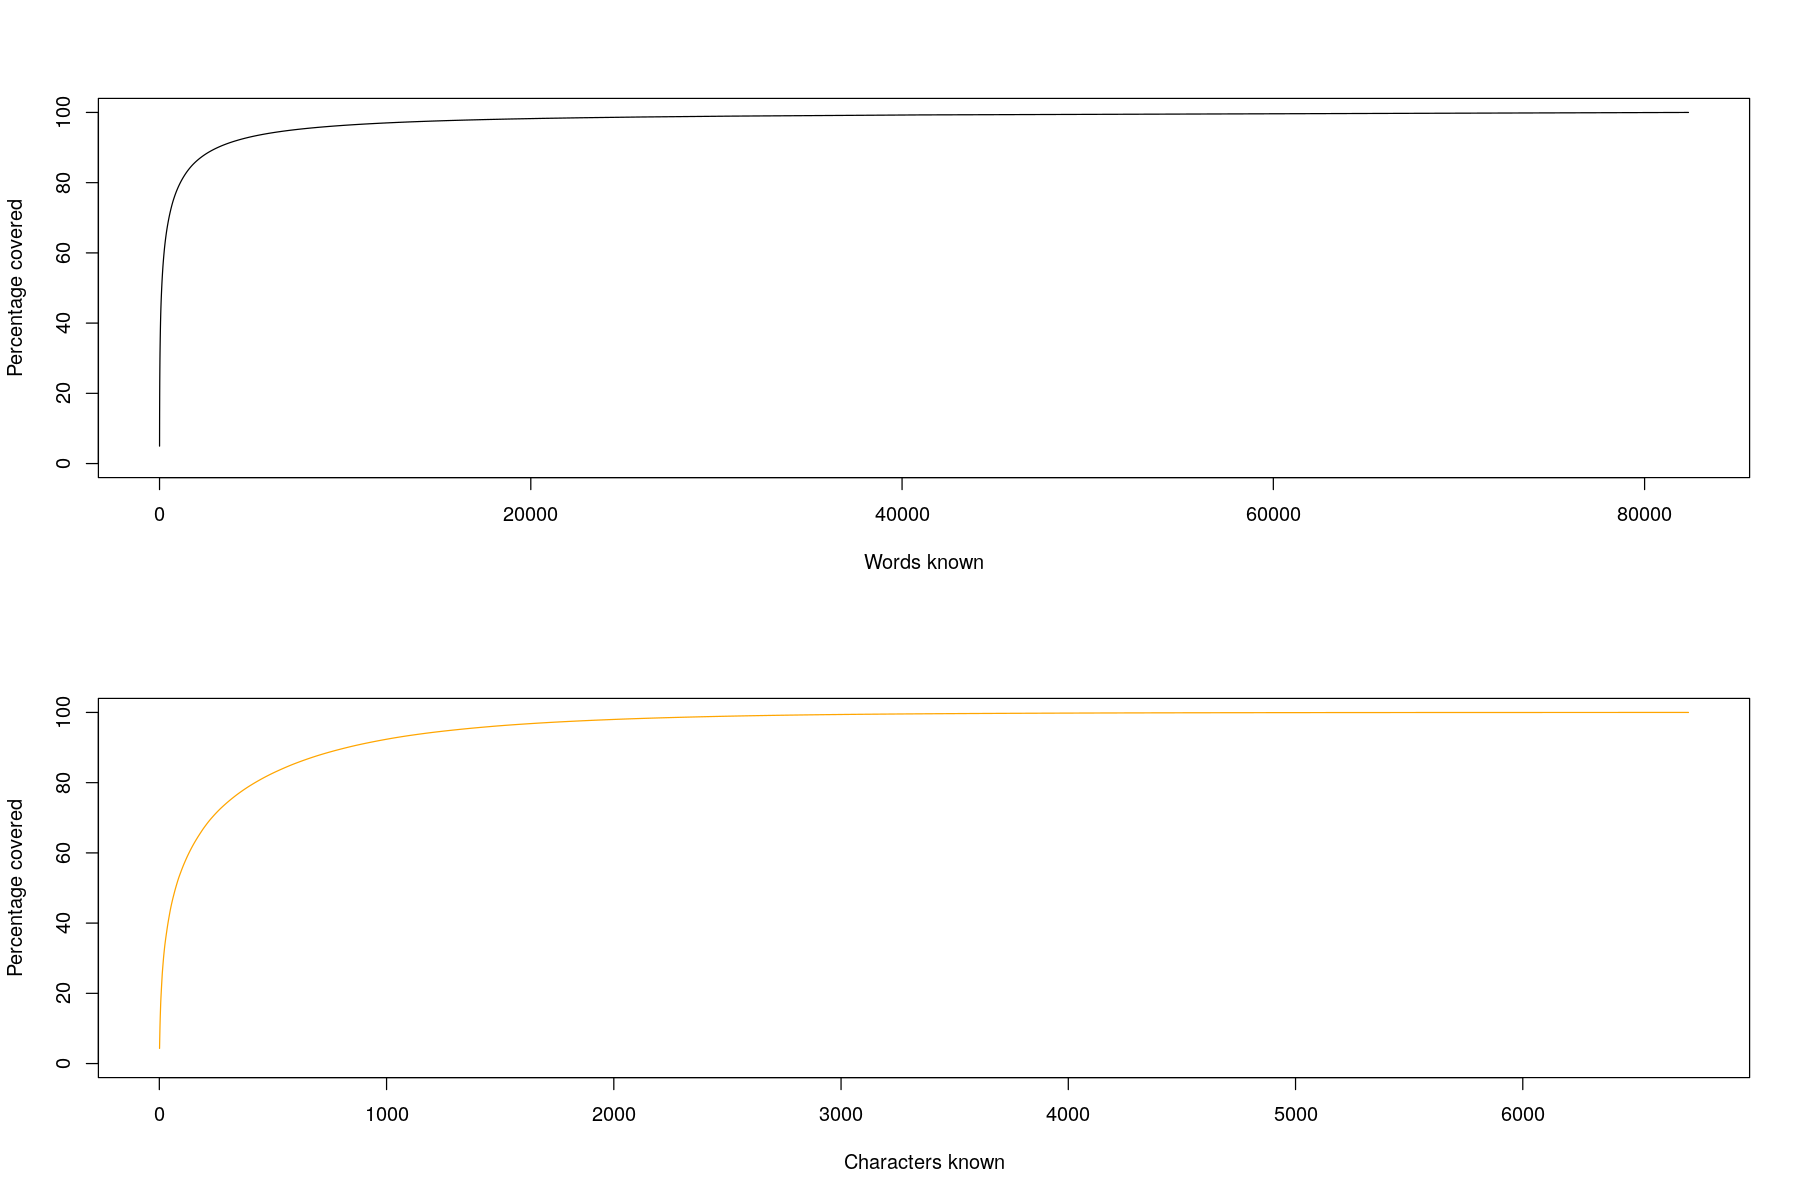

In [3]:
frequencies.words<-data.words[,2]
total.words<-sum(frequencies.words)
percent.words<-(frequencies.words/total.words)*100
acumPercent.words<-cumsum(percent.words)

frequencies.chars<-data.chars[,2]
total.chars<-sum(frequencies.chars)
percent.chars<-(frequencies.chars/total.chars)*100
acumPercent.chars<-cumsum(percent.chars)

#plot acumulates
par(mfrow=c(2,1))
plot(acumPercent.words,ylim=c(0,100),type="l",xlab="Words known",ylab="Percentage covered")
plot(acumPercent.chars,ylim=c(0,100),col="orange",type="l",xlab="Characters known",ylab="Percentage covered")

The plots represent the amounts of words (black line) and characters (orange line) needed to cover a percentage of chinese language.

As we can see, the first most frequent characters covers almost 90% of chinese language. It means that a few words are necessary to learn in order to understand the most part of the texts.

We may want to plot first 3000 words (black line) and first 3000 characters (orange line).

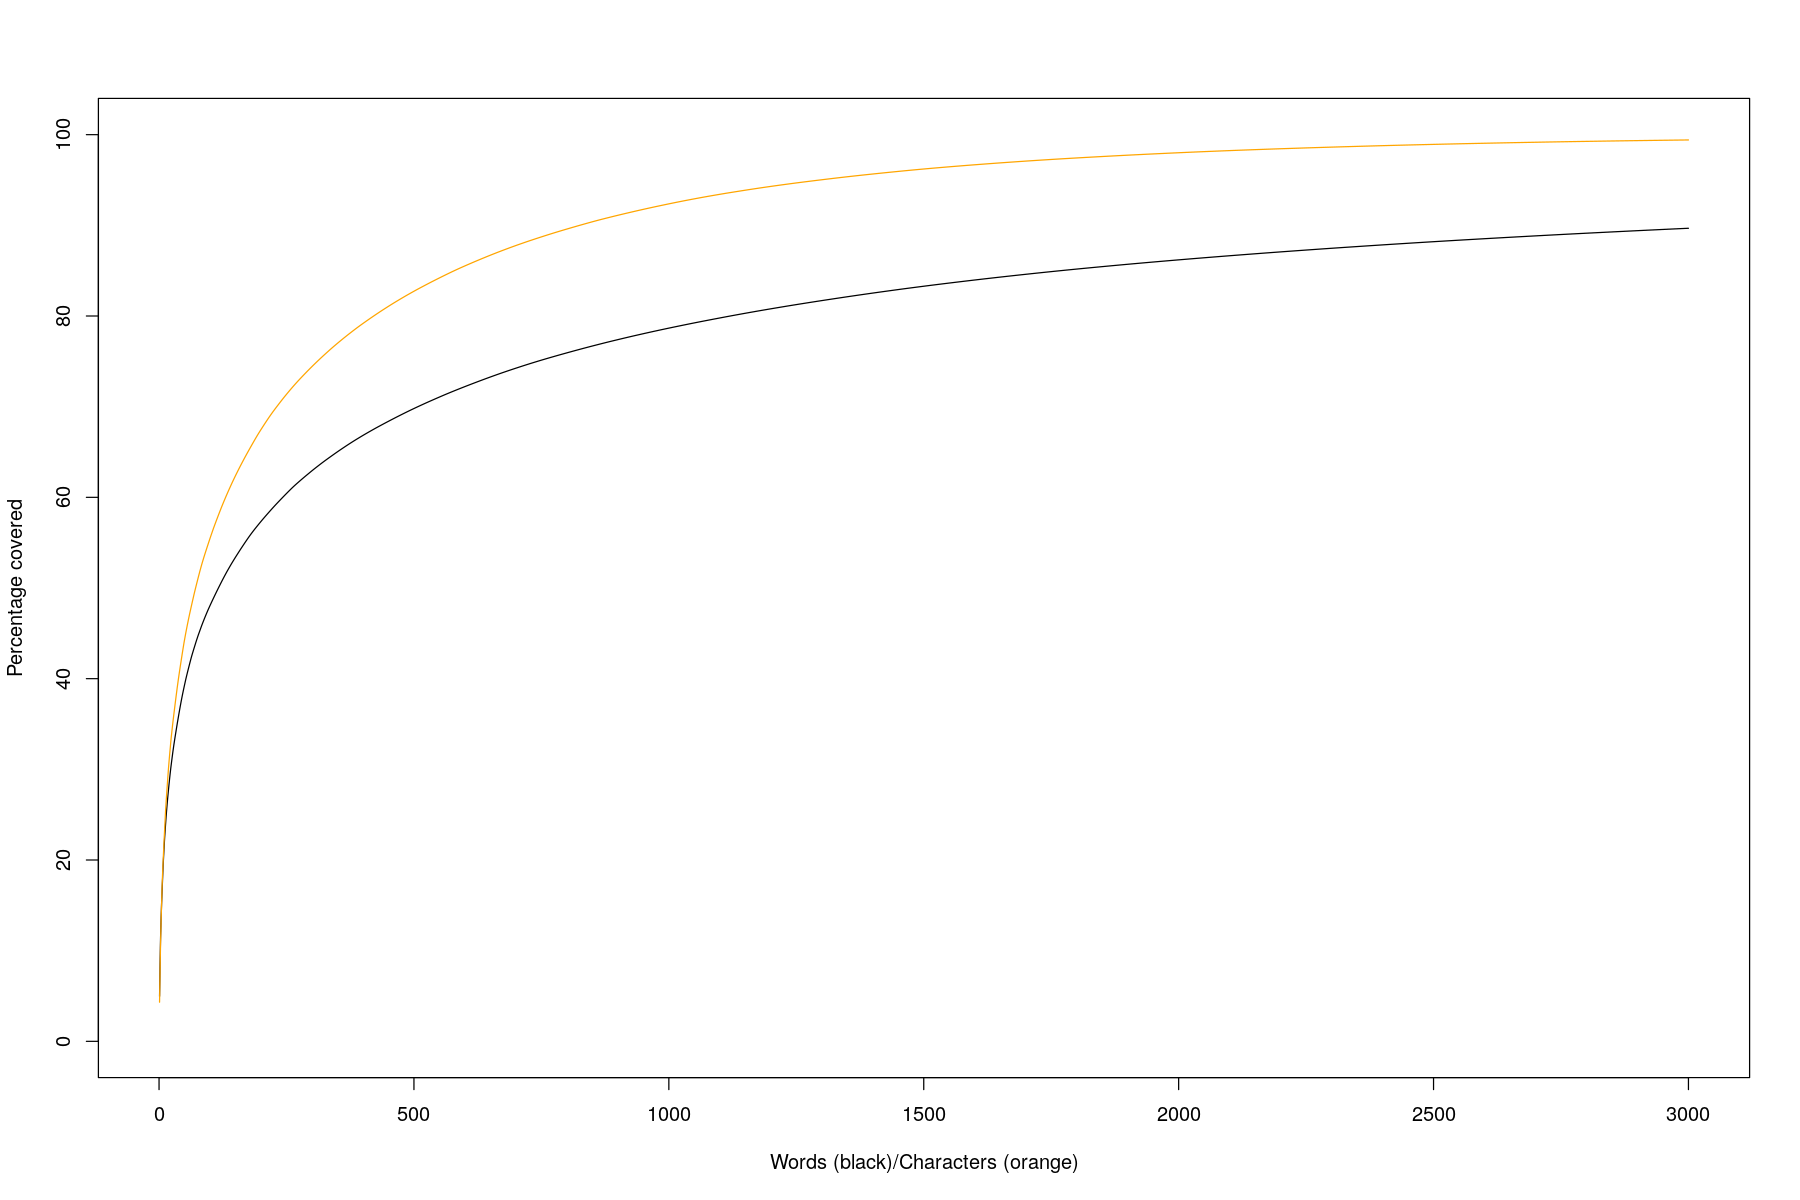

In [4]:
plot(acumPercent.words[1:3000],ylim=c(0,100),type="l",xlab="Words (black)/Characters (orange)",ylab="Percentage covered")
lines(acumPercent.chars[1:3000],col="orange")

Now we have an idea of the different amount of words needed to understand a chinese text.


## Summary

As summary, we remark the following:

* About the words:

In [5]:
print( paste("100 words cover",toString(round(acumPercent.words[100],1)),"% of the language" ,sep=" ") )
print( paste("500 words cover",toString(round(acumPercent.words[500],1)),"% of the language" ,sep=" ") )
print( paste("1000 words cover",toString(round(acumPercent.words[1000],1)),"% of the language" ,sep=" ") )
print( paste("3000 words cover",toString(round(acumPercent.words[3000],1)),"% of the language" ,sep=" ") )
print( paste("5000 words cover",toString(round(acumPercent.words[5000],1)),"% of the language" ,sep=" ") )


[1] "100 words cover 48.1 % of the language"
[1] "500 words cover 69.8 % of the language"
[1] "1000 words cover 78.7 % of the language"
[1] "3000 words cover 89.7 % of the language"
[1] "5000 words cover 93.1 % of the language"


* About the characters:

In [6]:
print( paste("100 characters cover",toString(round(acumPercent.chars[100],1)),"% of the language" ,sep=" ") )
print( paste("500 characters cover",toString(round(acumPercent.chars[500],1)),"% of the language" ,sep=" ") )
print( paste("1000 characters cover",toString(round(acumPercent.chars[1000],1)),"% of the language" ,sep=" ") )
print( paste("3000 characters cover",toString(round(acumPercent.chars[3000],1)),"% of the language" ,sep=" ") )
print( paste("5000 characters cover",toString(round(acumPercent.chars[5000],1)),"% of the language" ,sep=" ") )

[1] "100 characters cover 55.5 % of the language"
[1] "500 characters cover 82.7 % of the language"
[1] "1000 characters cover 92.4 % of the language"
[1] "3000 characters cover 99.4 % of the language"
[1] "5000 characters cover 99.9 % of the language"


* Words/character needed:

In [7]:
print( paste("To cover 50% of the language",toString(which.min(abs(acumPercent.words - 50))),"words are needed (or",which.min(abs(acumPercent.chars - 50)),"characters)." ,sep=" ") )
print( paste("To cover 60% of the language",toString(which.min(abs(acumPercent.words - 60))),"words are needed (or",which.min(abs(acumPercent.chars - 60)),"characters)." ,sep=" ") )
print( paste("To cover 80% of the language",toString(which.min(abs(acumPercent.words - 80))),"words are needed (or",which.min(abs(acumPercent.chars - 80)),"characters)." ,sep=" ") )
print( paste("To cover 90% of the language",toString(which.min(abs(acumPercent.words - 90))),"words are needed (or",which.min(abs(acumPercent.chars - 90)),"characters)." ,sep=" ") )

[1] "To cover 50% of the language 116 words are needed (or 72 characters)."
[1] "To cover 60% of the language 243 words are needed (or 131 characters)."
[1] "To cover 80% of the language 1121 words are needed (or 421 characters)."
[1] "To cover 90% of the language 3129 words are needed (or 825 characters)."


Similar patterns are also true for other languages.